<a href="https://colab.research.google.com/github/Phuc-Homoji/BaiTapAI/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [3]:
train_data = '/content/drive/MyDrive/AI/NhanDienKhuonMat/Train'
val_data  =  '/content/drive/MyDrive/AI/NhanDienKhuonMat/Validation'
test_data =  '/content/drive/MyDrive/AI/NhanDienKhuonMat/Test'

In [5]:
from keras.engine.data_adapter import train_validation_split
#preprocessing
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(100, 100),
                        batch_size=30,
                        class_mode="categorical")

val_input = data_scale.flow_from_directory(val_data,
                        target_size=(100, 100),
                        batch_size=30,
                        class_mode="categorical")

test_input = data_scale.flow_from_directory(test_data,
                        target_size=(100, 100),
                        batch_size=30,
                        class_mode="categorical")

Found 3953 images belonging to 2 classes.
Found 1269 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [6]:
#setting lable
class_face = ['None','Phuc']

print("labels: ", class_face)
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

labels:  ['None', 'Phuc']
match class:  {'Anotherface_Train': 0, 'Phuc_Train': 1}
Tổng cộng:  2


In [7]:
#MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 4
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))



#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2,activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 16)        0

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
face_train = model.fit(train_input,batch_size=75,epochs=10,verbose=1,validation_data=val_input)

Epoch 1/10
132/132 [==============================] - 85s 621ms/step - loss: 0.0184 - accuracy: 0.9957 - val_loss: 0.0091 - val_accuracy: 0.9976
Epoch 2/10
132/132 [==============================] - 72s 541ms/step - loss: 0.0048 - accuracy: 0.9975 - val_loss: 0.0102 - val_accuracy: 0.9984
Epoch 3/10
132/132 [==============================] - 69s 526ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.0090 - val_accuracy: 0.9984
Epoch 4/10
132/132 [==============================] - 70s 533ms/step - loss: 0.0012 - accuracy: 0.9990 - val_loss: 0.0078 - val_accuracy: 0.9984
Epoch 5/10
132/132 [==============================] - 68s 516ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.0124 - val_accuracy: 0.9976
Epoch 6/10
132/132 [==============================] - 70s 532ms/step - loss: 0.0028 - accuracy: 0.9985 - val_loss: 0.0189 - val_accuracy: 0.9984
Epoch 7/10
132/132 [==============================] - 68s 516ms/step - loss: 0.0072 - accuracy: 0.9970 - val_loss: 0.0048 - val_ac

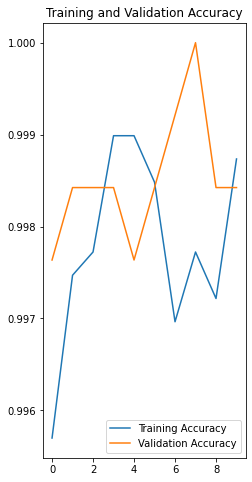

In [18]:
acc = face_train.history['accuracy']
val_acc = face_train.history['val_accuracy']

loss = face_train.history['loss']
val_loss = face_train.history['val_loss']
epochs_range=range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [20]:
model.save('/content/drive/MyDrive/AI/NhanDienKhuonMat/face.h5')

Đây là Phúc


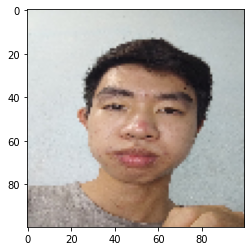

In [21]:
pic = image.load_img('/content/drive/MyDrive/AI/NhanDienKhuonMat/Test/Phuc_Test/phuc1.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#du doan khuon mat
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Đây không phải Phúc")
if guess[0]==1:
  print("Đây là Phúc")

Đây không phải Phúc


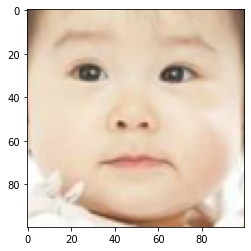

In [23]:
pic = image.load_img('/content/drive/MyDrive/AI/NhanDienKhuonMat/Train/Anotherface_Train/1_1_2_20161219202852780.jpg.chip.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#du doan khuon mat
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Đây không phải Phúc")
if guess[0]==1:
  print("Đây là Phúc")